In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from cascade.cascade_driver import CascadeDriver
cas_driver = CascadeDriver()

 +-----------------------------------------------------------------------+
 |                                                                       |
 |                       DPMJET-III version 19.1.5                       |
 |                                                                       |
 |                      (Last change:  16 Jan 2023)                      |
 |                                                                       |
 |            Authors:                                                   |
 |                     Stefan Roesler     (CERN)                         |
 |                     Anatoli Fedynitch (ASIoP)                         |
 |                     Ralph Engel        (KIT)                          |
 |                     Johannes Ranft     (Siegen Univ.)                 |
 |                                                                       |
 |        https://github.com/afedynitch/dpmjet                           |
 |                       

In [2]:
from tqdm import tqdm
# mceq_decaying_pdgs = [111, -211, 211]

# mceq_decaying_pdgs = [-11, 11, -12, 12, -14, 14, 16, 22,
#                         111, 130, -211, 211, 310,
#                         -321, 321, -2112, 2112, 
#                         -2212, 2212, -3122, 3122]

# mceq_decaying_pdgs = [111, 130, 310, -13, 13, -211, 211]
# mceq_decaying_pdgs = [111, 130, 310]

# mceq_decaying_pdgs = [-11, 11, -12, 12, -14, 14, 
#                       -16, 16, 22, 
#                         111, 130, 310, -321, 321, 
#                         -411, 411, -421, 421, -431, 431, 
#                         -2112, 2112, -2212, 2212, -3122, 3122
#                         ]

mceq_decaying_pdgs = [-11, 11, -12, 12, -13, 13, -14, 14, 
                      -16, 16, 22, 
                        111, 130, -211, 211, 310, -321, 321, 
                        -411, 411, -421, 421, -431, 431, 
                        -2112, 2112, -2212, 2212, -3122, 3122
                        ]


cas_driver.simulation_parameters(pdg = 2212, energy = 1e2, 
                                 zenith_angle = 30, xdepth = 0,
                                 threshold_energy = 1e-6, stop_height = 0,
                                 accumulate_runs = True, reset_ids = True,
                                 mceq_decaying_pdgs = mceq_decaying_pdgs)

niter = 30000
for i in tqdm(range(niter), total = niter):
    cas_driver.run()

MCEqRun::set_interaction_model(): DPMJETIII191
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): Primary model set to Hillas-Gaisser (H3a)
Tabulate cross-section for pi0(111)
Tabulate cross-section for K_L0(130)
Tabulate cross-section for pi-(-211)
Tabulate cross-section for pi+(211)
Tabulate cross-section for K_S0(310)
Tabulate cross-section for K-(-321)
Tabulate cross-section for K+(321)
Tabulate cross-section for D-(-411)
Tabulate cross-section for D+(411)
Tabulate cross-section for Dbar0(-421)
Tabulate cross-section for D0(421)
Tabulate cross-section for D_s-(-431)
Tabulate cross-section for D_s+(431)
Tabulate cross-section for nbar0(-2112)
Tabulate cross-section for n0(2112)
Tabulate cross-section for pbar-(-2212)
Tabulate cross-section for p+(2212)
Tabulate cross-section for Lambdabar0(-3122)
Tabulate cross-section for Lam

  0%|          | 0/30000 [00:00<?, ?it/s]

1                                                                              
 ******************************************************************************
 ******************************************************************************
 **                                                                          **
 **                                                                          **
 **              *......*                  Welcome to the Lund Monte Carlo!  **
 **         *:::!!:::::::::::*                                               **
 **      *::::::!!::::::::::::::*          PPP  Y   Y TTTTT H   H III   A    **
 **    *::::::::!!::::::::::::::::*        P  P  Y Y    T   H   H  I   A A   **
 **   *:::::::::!!:::::::::::::::::*       PPP    Y     T   HHHHH  I  AAAAA  **
 **   *:::::::::!!:::::::::::::::::*       P      Y     T   H   H  I  A   A  **
 **    *::::::::!!::::::::::::::::*!       P      Y     T   H   H III A   A  **
 **      *::::::!!::::::::::::::* !!    

  0%|          | 1/30000 [00:10<83:59:01, 10.08s/it]


     Advisory warning type 9 given after        7 PYEXEC calls:
     (PYKFIN:) PARJ(18)<1 combined with 0<MSTJ(12)<5 option

     Advisory warning type 9 given after        9 PYEXEC calls:
     (PYKFIN:) PARJ(18)<1 combined with 0<MSTJ(12)<5 option

     Advisory warning type 9 given after       11 PYEXEC calls:
     (PYKFIN:) PARJ(18)<1 combined with 0<MSTJ(12)<5 option

     Advisory warning type 9 given after       13 PYEXEC calls:
     (PYKFIN:) PARJ(18)<1 combined with 0<MSTJ(12)<5 option


  0%|          | 2/30000 [00:12<45:45:34,  5.49s/it]


     Advisory warning type 9 given after       15 PYEXEC calls:
     (PYKFIN:) PARJ(18)<1 combined with 0<MSTJ(12)<5 option

     Advisory warning type 9 given after       17 PYEXEC calls:
     (PYKFIN:) PARJ(18)<1 combined with 0<MSTJ(12)<5 option

     Advisory warning type 9 given after       20 PYEXEC calls:
     (PYKFIN:) PARJ(18)<1 combined with 0<MSTJ(12)<5 option


  1%|          | 286/30000 [00:52<06:24, 77.34it/s] 


     Error type 4 has occured after     2149 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


  2%|▏         | 583/30000 [00:57<06:10, 79.33it/s]


     Error type 4 has occured after     4390 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after     4390 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


  2%|▏         | 622/30000 [00:58<05:36, 87.24it/s]


     Error type 4 has occured after     4657 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


  2%|▏         | 689/30000 [00:59<05:18, 92.13it/s]


     Error type 4 has occured after     5094 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after     5094 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


  3%|▎         | 878/30000 [01:01<05:52, 82.64it/s]


     Error type 4 has occured after     6584 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after     6584 PYEXEC calls:
     (PYINDF:) unphysical flavour combination

     Error type 4 has occured after     6585 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


  4%|▎         | 1113/30000 [01:04<04:52, 98.65it/s]


     Error type 4 has occured after     8377 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


  4%|▍         | 1153/30000 [01:04<04:56, 97.41it/s]


     Error type 4 has occured after     8631 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


  4%|▍         | 1233/30000 [01:05<05:15, 91.29it/s]


     Error type 4 has occured after     9295 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


  4%|▍         | 1253/30000 [01:05<05:30, 87.05it/s]


     Error type 4 has occured after     9462 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 4 has occured after     9523 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after     9523 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


  5%|▍         | 1431/30000 [01:07<05:14, 90.89it/s]


     Error type 4 has occured after    10850 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    10850 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


  5%|▌         | 1625/30000 [01:09<05:15, 90.05it/s]


     Error type 4 has occured after    12295 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


  9%|▉         | 2708/30000 [01:21<04:41, 96.82it/s]


     Error type 4 has occured after    20582 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    20582 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 11%|█         | 3190/30000 [01:27<05:10, 86.33it/s]


     Error type 4 has occured after    24319 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 12%|█▏        | 3475/30000 [01:30<04:47, 92.37it/s]


     Error type 4 has occured after    26438 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    26438 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 12%|█▏        | 3525/30000 [01:30<05:34, 79.22it/s]


     Error type 4 has occured after    26821 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    26821 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 14%|█▎        | 4110/30000 [01:37<04:49, 89.36it/s]


     Error type 4 has occured after    31294 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    31294 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 16%|█▋        | 4877/30000 [01:45<04:45, 88.02it/s]


     Error type 4 has occured after    37209 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 17%|█▋        | 5064/30000 [01:48<04:47, 86.67it/s]


     Error type 4 has occured after    38556 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 18%|█▊        | 5297/30000 [01:50<04:41, 87.74it/s]


     Error type 4 has occured after    40430 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 18%|█▊        | 5418/30000 [01:51<04:48, 85.31it/s]


     Error type 4 has occured after    41429 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    41429 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 19%|█▊        | 5578/30000 [01:53<04:30, 90.37it/s]


     Error type 4 has occured after    42599 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    42599 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 19%|█▉        | 5827/30000 [01:56<04:22, 91.98it/s]


     Error type 4 has occured after    44587 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    44587 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 20%|██        | 6143/30000 [02:00<04:34, 86.89it/s]


     Error type 4 has occured after    47004 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    47004 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 21%|██        | 6217/30000 [02:00<04:31, 87.48it/s]


     Error type 4 has occured after    47554 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 21%|██        | 6369/30000 [02:02<04:33, 86.50it/s]


     Error type 4 has occured after    48732 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    48732 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 21%|██▏       | 6396/30000 [02:03<04:36, 85.34it/s]


     Error type 4 has occured after    48945 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 4 has occured after    48996 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 22%|██▏       | 6513/30000 [02:04<04:30, 86.74it/s]


     Error type 4 has occured after    49783 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    49783 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 22%|██▏       | 6541/30000 [02:04<04:43, 82.86it/s]


     Error type 4 has occured after    50040 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 24%|██▍       | 7150/30000 [02:12<05:02, 75.60it/s]


     Error type 4 has occured after    54683 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    54683 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 24%|██▍       | 7315/30000 [02:14<04:00, 94.22it/s]


     Error type 4 has occured after    55933 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 25%|██▍       | 7424/30000 [02:15<04:20, 86.80it/s]


     Error type 4 has occured after    56753 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    56753 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 26%|██▌       | 7791/30000 [02:19<05:34, 66.43it/s]


     Error type 4 has occured after    59600 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    59600 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 26%|██▌       | 7868/30000 [02:20<04:08, 88.97it/s]


     Error type 4 has occured after    60150 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    60150 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 26%|██▋       | 7944/30000 [02:21<04:37, 79.45it/s]


     Error type 4 has occured after    60747 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 27%|██▋       | 8248/30000 [02:25<04:11, 86.57it/s]


     Error type 4 has occured after    63092 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    63092 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 28%|██▊       | 8510/30000 [02:28<03:57, 90.58it/s]


     Error type 4 has occured after    65042 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 29%|██▉       | 8631/30000 [02:30<04:12, 84.72it/s]


     Error type 4 has occured after    66058 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    66058 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 29%|██▉       | 8800/30000 [02:32<03:35, 98.53it/s]


     Error type 4 has occured after    67285 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    67285 PYEXEC calls:
     (PYINDF:) unphysical flavour combination

     Error type 4 has occured after    67286 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    67286 PYEXEC calls:
     (PYINDF:) unphysical flavour combination

     Error type 4 has occured after    67287 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 4 has occured after    67288 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    67288 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 30%|███       | 9016/30000 [02:34<04:09, 84.03it/s]


     Error type 4 has occured after    68871 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    68871 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 30%|███       | 9054/30000 [02:35<04:06, 84.92it/s]


     Error type 4 has occured after    69181 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 31%|███       | 9151/30000 [02:36<03:49, 90.83it/s]


     Error type 4 has occured after    69878 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 31%|███       | 9344/30000 [02:38<03:29, 98.50it/s]


     Error type 4 has occured after    71356 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 31%|███▏      | 9432/30000 [02:39<04:21, 78.73it/s]


     Error type 4 has occured after    72113 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    72113 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 32%|███▏      | 9530/30000 [02:40<04:17, 79.44it/s]


     Error type 4 has occured after    72901 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    72901 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 33%|███▎      | 9766/30000 [02:43<04:45, 70.97it/s]


     Error type 4 has occured after    74714 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    74714 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 33%|███▎      | 9998/30000 [02:46<03:33, 93.58it/s]


     Error type 4 has occured after    76379 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    76379 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 33%|███▎      | 10019/30000 [02:46<03:27, 96.08it/s]


     Error type 4 has occured after    76523 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 34%|███▍      | 10166/30000 [02:48<03:48, 86.66it/s]


     Error type 4 has occured after    77674 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 34%|███▍      | 10196/30000 [02:48<03:32, 93.01it/s]


     Error type 4 has occured after    77852 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 35%|███▍      | 10437/30000 [02:51<04:06, 79.42it/s]


     Error type 4 has occured after    79695 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 35%|███▌      | 10643/30000 [02:53<03:44, 86.36it/s]


     Error type 4 has occured after    81315 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 36%|███▋      | 10877/30000 [02:56<04:03, 78.61it/s]


     Error type 4 has occured after    83045 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 37%|███▋      | 11169/30000 [02:59<03:18, 94.89it/s]


     Error type 4 has occured after    85202 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 4 has occured after    85203 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    85203 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 37%|███▋      | 11229/30000 [03:00<03:39, 85.43it/s]


     Error type 4 has occured after    85697 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 39%|███▉      | 11804/30000 [03:06<03:21, 90.20it/s]


     Error type 4 has occured after    90146 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    90146 PYEXEC calls:
     (PYINDF:) unphysical flavour combination

     Error type 4 has occured after    90147 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 40%|███▉      | 11863/30000 [03:07<03:30, 86.16it/s]


     Error type 4 has occured after    90597 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 4 has occured after    90598 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    90598 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 40%|███▉      | 11924/30000 [03:08<03:16, 91.93it/s]


     Error type 4 has occured after    91071 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 4 has occured after    91072 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 4 has occured after    91074 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 40%|████      | 12015/30000 [03:09<03:32, 84.49it/s]


     Error type 4 has occured after    91732 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 41%|████      | 12226/30000 [03:11<03:10, 93.19it/s]


     Error type 4 has occured after    93356 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 43%|████▎     | 12875/30000 [03:18<03:06, 91.75it/s]


     Error type 4 has occured after    98314 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    98314 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 43%|████▎     | 12986/30000 [03:19<03:04, 92.08it/s]


     Error type 4 has occured after    99252 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    99252 PYEXEC calls:
     (PYINDF:) unphysical flavour combination

     Error type 4 has occured after    99366 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after    99366 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 44%|████▍     | 13133/30000 [03:21<03:12, 87.42it/s]


     Error type 4 has occured after   100448 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   100448 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 44%|████▍     | 13151/30000 [03:21<03:22, 83.36it/s]


     Error type 4 has occured after   100631 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   100631 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 44%|████▍     | 13277/30000 [03:23<03:08, 88.87it/s]


     Error type 4 has occured after   101591 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 47%|████▋     | 14017/30000 [03:31<03:36, 73.76it/s]


     Error type 4 has occured after   107426 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   107426 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 47%|████▋     | 14183/30000 [03:33<03:21, 78.34it/s]


     Error type 4 has occured after   108547 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   108547 PYEXEC calls:
     (PYINDF:) unphysical flavour combination

     Error type 4 has occured after   108612 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 49%|████▊     | 14570/30000 [03:38<02:49, 90.86it/s]


     Error type 4 has occured after   111564 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   111564 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 49%|████▉     | 14630/30000 [03:38<02:48, 90.99it/s]


     Error type 4 has occured after   111963 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 4 has occured after   112015 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   112015 PYEXEC calls:
     (PYINDF:) unphysical flavour combination

     Error type 4 has occured after   112016 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 4 has occured after   112017 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 49%|████▉     | 14706/30000 [03:39<02:58, 85.76it/s]


     Error type 4 has occured after   112587 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   112587 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 50%|█████     | 15065/30000 [03:43<02:52, 86.42it/s]


     Error type 4 has occured after   115474 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 4 has occured after   115475 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   115475 PYEXEC calls:
     (PYINDF:) unphysical flavour combination

     Error type 4 has occured after   115513 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 50%|█████     | 15084/30000 [03:44<02:55, 85.00it/s]


     Error type 4 has occured after   115677 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 51%|█████▏    | 15401/30000 [03:47<02:48, 86.79it/s]


     Error type 4 has occured after   118095 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 52%|█████▏    | 15733/30000 [03:51<02:44, 86.95it/s]


     Error type 4 has occured after   120742 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 53%|█████▎    | 15832/30000 [03:52<02:42, 87.18it/s]


     Error type 4 has occured after   121495 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   121495 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 54%|█████▍    | 16143/30000 [03:55<02:31, 91.28it/s]


     Error type 4 has occured after   123931 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 4 has occured after   123932 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 4 has occured after   123934 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 54%|█████▍    | 16242/30000 [03:57<02:46, 82.54it/s]


     Error type 4 has occured after   124709 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 54%|█████▍    | 16299/30000 [03:57<02:39, 85.79it/s]


     Error type 4 has occured after   125116 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   125116 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 54%|█████▍    | 16336/30000 [03:58<02:42, 84.16it/s]


     Error type 4 has occured after   125413 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 55%|█████▍    | 16355/30000 [03:58<02:39, 85.61it/s]


     Error type 4 has occured after   125581 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 55%|█████▍    | 16419/30000 [03:59<02:43, 82.82it/s]


     Error type 4 has occured after   126005 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 4 has occured after   126053 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   126053 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 56%|█████▌    | 16752/30000 [04:03<02:30, 87.85it/s]


     Error type 4 has occured after   128552 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   128552 PYEXEC calls:
     (PYINDF:) unphysical flavour combination

     Error type 4 has occured after   128553 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 57%|█████▋    | 17047/30000 [04:06<02:27, 87.64it/s]


     Error type 4 has occured after   130877 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 57%|█████▋    | 17147/30000 [04:07<02:18, 92.97it/s]


     Error type 4 has occured after   131576 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   131576 PYEXEC calls:
     (PYSTRF:) unphysical flavour combination


 58%|█████▊    | 17319/30000 [04:09<02:23, 88.13it/s]


     Error type 4 has occured after   132917 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   132917 PYEXEC calls:
     (PYINDF:) unphysical flavour combination

     Error type 4 has occured after   133028 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   133028 PYEXEC calls:
     (PYINDF:) unphysical flavour combination

     Error type 4 has occured after   133029 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   133029 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 58%|█████▊    | 17540/30000 [04:11<02:20, 88.79it/s]


     Error type 4 has occured after   134591 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   134591 PYEXEC calls:
     (PYINDF:) unphysical flavour combination

     Error type 4 has occured after   134592 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 59%|█████▉    | 17708/30000 [04:13<02:16, 89.82it/s]


     Error type 4 has occured after   135949 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 59%|█████▉    | 17765/30000 [04:14<02:19, 87.73it/s]


     Error type 4 has occured after   136418 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 61%|██████    | 18370/30000 [04:21<02:16, 85.00it/s]


     Error type 4 has occured after   140824 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 4 has occured after   140825 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   140825 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 61%|██████▏   | 18398/30000 [04:21<02:12, 87.38it/s]


     Error type 4 has occured after   140993 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 4 has occured after   141094 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 4 has occured after   141116 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 4 has occured after   141117 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 62%|██████▏   | 18500/30000 [04:23<02:57, 64.91it/s]


     Error type 4 has occured after   141860 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 4 has occured after   141861 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   141861 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 62%|██████▏   | 18634/30000 [04:24<02:20, 80.99it/s]


     Error type 4 has occured after   142933 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   142933 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 62%|██████▏   | 18683/30000 [04:25<02:00, 93.93it/s]


     Error type 4 has occured after   143254 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   143254 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 63%|██████▎   | 18760/30000 [04:26<02:25, 77.05it/s]


     Error type 4 has occured after   143878 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 63%|██████▎   | 18887/30000 [04:28<02:00, 92.27it/s]


     Error type 4 has occured after   144774 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   144774 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 63%|██████▎   | 18939/30000 [04:28<01:53, 97.40it/s]


     Error type 4 has occured after   145132 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   145132 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 65%|██████▍   | 19388/30000 [04:34<02:23, 74.02it/s]


     Error type 4 has occured after   148673 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   148673 PYEXEC calls:
     (PYINDF:) unphysical flavour combination

     Error type 4 has occured after   148674 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   148674 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 65%|██████▌   | 19612/30000 [04:36<01:50, 93.87it/s]


     Error type 4 has occured after   150276 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   150276 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 66%|██████▌   | 19720/30000 [04:37<01:54, 89.61it/s]


     Error type 4 has occured after   151094 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   151094 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 69%|██████▊   | 20617/30000 [04:48<01:42, 91.98it/s]


     Error type 4 has occured after   157823 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 69%|██████▉   | 20677/30000 [04:49<01:39, 94.08it/s]


     Error type 4 has occured after   158295 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 4 has occured after   158296 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 69%|██████▉   | 20755/30000 [04:49<01:38, 93.69it/s]


     Error type 4 has occured after   158858 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 70%|██████▉   | 20907/30000 [04:51<01:41, 89.81it/s]


     Error type 4 has occured after   160006 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 70%|███████   | 21131/30000 [04:53<01:35, 92.77it/s]


     Error type 4 has occured after   161756 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 71%|███████   | 21365/30000 [04:56<01:34, 91.54it/s]


     Error type 4 has occured after   163509 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   163509 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 72%|███████▏  | 21651/30000 [05:00<02:07, 65.35it/s]


     Error type 4 has occured after   165751 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 4 has occured after   165753 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 72%|███████▏  | 21692/30000 [05:00<01:37, 84.82it/s]


     Error type 4 has occured after   166057 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 73%|███████▎  | 21783/30000 [05:01<01:30, 90.78it/s]


     Error type 4 has occured after   166731 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 73%|███████▎  | 21910/30000 [05:03<01:32, 87.44it/s]


     Error type 4 has occured after   167714 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 73%|███████▎  | 21959/30000 [05:03<01:29, 90.04it/s]


     Error type 4 has occured after   168050 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 74%|███████▍  | 22294/30000 [05:07<01:28, 87.38it/s]


     Error type 4 has occured after   170684 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 74%|███████▍  | 22330/30000 [05:08<01:33, 81.85it/s]


     Error type 4 has occured after   170979 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   170979 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 75%|███████▍  | 22449/30000 [05:09<01:30, 83.23it/s]


     Error type 4 has occured after   171853 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 4 has occured after   171922 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   171922 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 76%|███████▌  | 22735/30000 [05:12<01:24, 85.71it/s]


     Error type 4 has occured after   173967 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   173967 PYEXEC calls:
     (PYINDF:) unphysical flavour combination

     Error type 4 has occured after   174066 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 77%|███████▋  | 23039/30000 [05:16<01:15, 92.56it/s]


     Error type 4 has occured after   176275 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   176275 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 77%|███████▋  | 23081/30000 [05:16<01:13, 94.74it/s]


     Error type 4 has occured after   176621 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   176621 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 78%|███████▊  | 23371/30000 [05:19<01:19, 83.14it/s]


     Error type 4 has occured after   178748 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 78%|███████▊  | 23480/30000 [05:21<01:09, 94.25it/s]


     Error type 4 has occured after   179612 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 79%|███████▉  | 23646/30000 [05:23<01:10, 90.20it/s]


     Error type 4 has occured after   180893 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   180893 PYEXEC calls:
     (PYINDF:) unphysical flavour combination

     Error type 4 has occured after   180894 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   180894 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 80%|███████▉  | 23982/30000 [05:26<01:02, 96.13it/s]


     Error type 4 has occured after   183513 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 80%|████████  | 24069/30000 [05:27<01:08, 86.16it/s]


     Error type 4 has occured after   184226 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 81%|████████  | 24209/30000 [05:29<01:05, 88.96it/s]


     Error type 4 has occured after   185277 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 4 has occured after   185278 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   185278 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 81%|████████  | 24321/30000 [05:30<01:01, 92.88it/s]


     Error type 4 has occured after   186177 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 82%|████████▏ | 24485/30000 [05:32<00:57, 96.56it/s] 


     Error type 4 has occured after   187352 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 84%|████████▍ | 25163/30000 [05:41<01:16, 63.45it/s]


     Error type 4 has occured after   192534 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 4 has occured after   192589 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   192589 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 85%|████████▌ | 25589/30000 [05:46<01:09, 63.39it/s]


     Error type 4 has occured after   195803 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 86%|████████▌ | 25780/30000 [05:48<00:50, 83.68it/s]


     Error type 4 has occured after   197275 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   197275 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 86%|████████▌ | 25869/30000 [05:49<00:46, 88.53it/s]


     Error type 4 has occured after   197960 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 87%|████████▋ | 26158/30000 [05:53<00:44, 86.95it/s]


     Error type 4 has occured after   200109 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   200109 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 88%|████████▊ | 26494/30000 [05:57<00:55, 63.25it/s]


     Error type 4 has occured after   202779 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   202779 PYEXEC calls:
     (PYINDF:) unphysical flavour combination

     Error type 4 has occured after   202780 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   202780 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 89%|████████▊ | 26591/30000 [05:58<00:45, 74.28it/s]


     Error type 4 has occured after   203464 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   203464 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 89%|████████▉ | 26752/30000 [06:00<00:40, 80.95it/s]


     Error type 4 has occured after   204714 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 89%|████████▉ | 26776/30000 [06:01<00:50, 63.85it/s]


     Error type 4 has occured after   204904 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   204904 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 90%|████████▉ | 26856/30000 [06:02<00:39, 80.45it/s]


     Error type 4 has occured after   205479 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 90%|████████▉ | 26935/30000 [06:03<00:46, 66.44it/s]


     Error type 4 has occured after   206087 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   206087 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 90%|█████████ | 27069/30000 [06:05<00:37, 78.88it/s]


     Error type 4 has occured after   207107 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   207107 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 91%|█████████ | 27193/30000 [06:06<00:40, 69.07it/s]


     Error type 4 has occured after   208039 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 91%|█████████ | 27240/30000 [06:07<00:32, 84.81it/s]


     Error type 4 has occured after   208361 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 4 has occured after   208362 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   208362 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 92%|█████████▏| 27546/30000 [06:10<00:28, 87.31it/s]


     Error type 4 has occured after   210747 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 94%|█████████▍| 28149/30000 [06:17<00:21, 84.82it/s]


     Error type 4 has occured after   215321 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   215321 PYEXEC calls:
     (PYINDF:) unphysical flavour combination

     Error type 4 has occured after   215343 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 4 has occured after   215344 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 95%|█████████▍| 28371/30000 [06:20<00:17, 91.45it/s]


     Error type 4 has occured after   217047 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   217047 PYEXEC calls:
     (PYINDF:) unphysical flavour combination

     Error type 4 has occured after   217048 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   217048 PYEXEC calls:
     (PYINDF:) unphysical flavour combination

     Error type 4 has occured after   217136 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   217136 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 95%|█████████▍| 28390/30000 [06:20<00:19, 84.13it/s]


     Error type 4 has occured after   217257 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 95%|█████████▍| 28489/30000 [06:21<00:16, 89.99it/s]


     Error type 4 has occured after   217953 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 96%|█████████▌| 28664/30000 [06:23<00:15, 86.31it/s]


     Error type 4 has occured after   219270 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 96%|█████████▌| 28807/30000 [06:25<00:13, 86.80it/s]


     Error type 4 has occured after   220371 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   220371 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 96%|█████████▋| 28875/30000 [06:26<00:12, 88.78it/s]


     Error type 4 has occured after   220833 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 97%|█████████▋| 29028/30000 [06:27<00:10, 93.71it/s]


     Error type 4 has occured after   222024 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 4 has occured after   222026 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 97%|█████████▋| 29102/30000 [06:28<00:10, 82.92it/s]


     Error type 4 has occured after   222628 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 4 has occured after   222671 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   222671 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 97%|█████████▋| 29140/30000 [06:29<00:11, 72.12it/s]


     Error type 4 has occured after   222940 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 4 has occured after   223044 PYEXEC calls:
     (PYSTRF:) caught in infinite loop

     Error type 2 has occured after   223044 PYEXEC calls:
     (PYINDF:) unphysical flavour combination


 99%|█████████▉| 29678/30000 [06:35<00:03, 85.07it/s]


     Error type 4 has occured after   227012 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


 99%|█████████▉| 29838/30000 [06:37<00:02, 63.77it/s]


     Error type 4 has occured after   228185 PYEXEC calls:
     (PYSTRF:) caught in infinite loop


100%|██████████| 30000/30000 [06:39<00:00, 75.10it/s]


In [3]:
from cascade.cascade_analysis import CascadeAnalysis

cascade_analysis = CascadeAnalysis(cas_driver)
cascade_analysis.print_stats()
# cascade_analysis.search_for_parents()

Number of runs = 30000
Initial state:
  $p$(2212) with energy = 1.000e+02

Final state:
  Number of all particles in cascade = 6572643
  Number of final particles = 4388788
  Number of interactions = 193041
  Number of decays = 1990814
  Max number of generations = 15

  Max xdepth = 1195.9290875457918
  Exectution time = 395.19 s
  Exectution time per run = 0.01 s
  Size of cascade_driver object = 1564.51 Mb

Energy conservation in cascade:
  Initial energy = 1.00000e+02 GeV
  Energy in final particles = 1.13900e+02 GeV
  Relative loss(+)/gain(-) -1.390e-01
All final ids are unique, min = 5, max = 6572642


{22: 283321, 14: 223293, -14: 220973, 11: 159053, -12: 157329, 2212: 136035, -11: 107777, 12: 106076, 2112: 26304, -13: 17914, 13: 15594, -2212: 1444, -2112: 9, -211: 1, 211: 1}


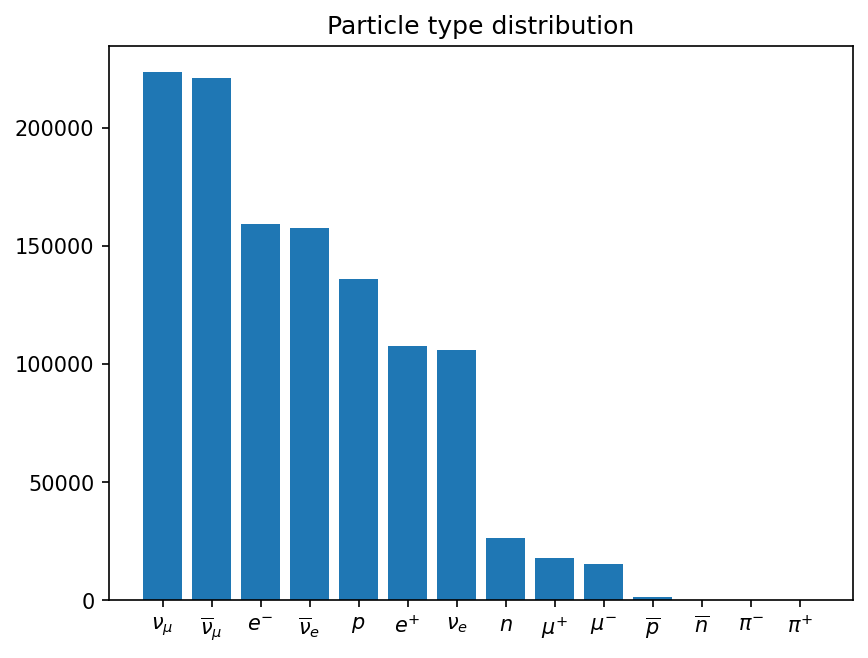

In [71]:
cascade_analysis.plot_ptypes_dist(from_ = 1)

        22 : 0.19908
        14 : 0.05195
       -14 : 0.04268
      2212 : 0.40527
        11 : 0.01173
       -12 : 0.00945
       -11 : 0.01293
        12 : 0.01075
       -13 : 0.10417
        13 : 0.07938
      2112 : 0.09267
     -2212 : 0.00568
       211 : 0.00912
      -211 : 0.00587
     -2112 : 0.00446
       130 : 0.00063
       321 : 0.00014
      -321 : 0.00008
      3122 : 0.00004
Total energy = 1.0460652769669545


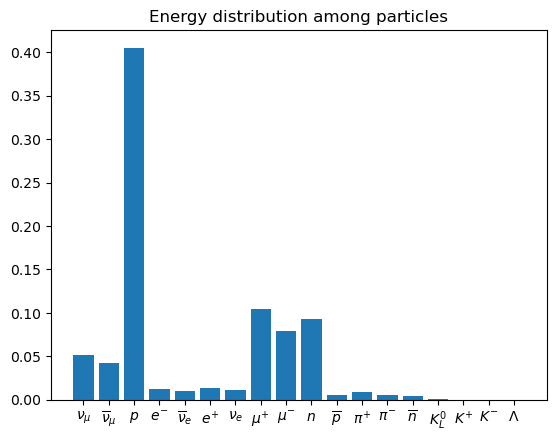

In [6]:
cascade_analysis.plot_ptypes_energy_dist(from_ = 1)

Min = 1.91e+04 eV, Max = 1.00e+11 eV


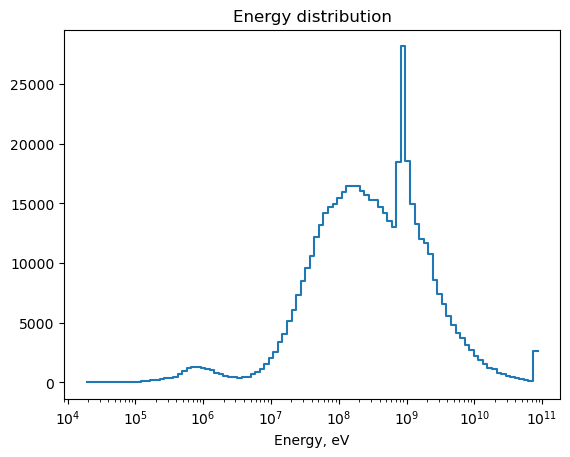

In [7]:
cascade_analysis.plot_energy()

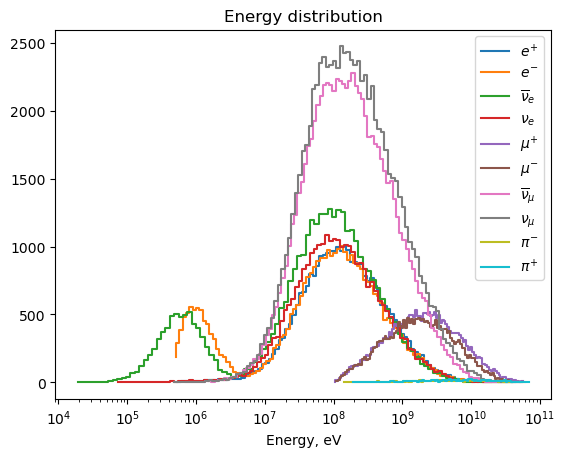

In [8]:
cascade_analysis.plot_energy_list(pids = [-11, 11, -12, 12, -13, 13, -14, 14, 
                                          -211, 211])

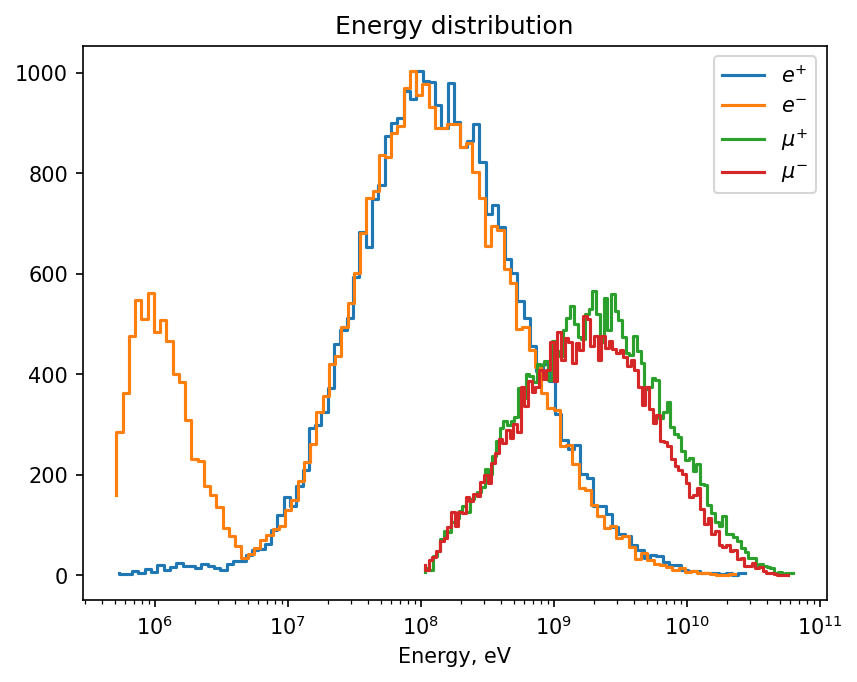

In [167]:
cascade_analysis.plot_energy_list(pids = [-11, 11, -13, 13])

In [4]:
# %autoreload 2
from mceq_comparison import MCEQDistributions
import matplotlib.pylab as plt
mceq_noloss = MCEQDistributions(
                 energy = 1e2,
                 pdg_id = 2212,
                 theta_deg = 30,
                #  slant_depth = 800,
                #  slant_depth = 635.9540964571235,
                #  slant_depth= 313.4599011471651,
                #  slant_depth=1193,
                #  slant_depth=2997,
                 energy_range=[0.01, 1e4],
                 slant_depth=1193.2842407419078,
                 pname_tuples = [
                     ("mu", "mu+", "mu-"),
                     ("numu", "numu", "antinumu"),
                     ("nue", "nue", "antinue"),
                     ("pi", "pi+", "pi-"),
                     ("el", "e+", "e-"),
                     ("e+", "e+"),
                     ("e-", "e-")],
                 interaction_model = "DPMJET-III-19.1",
                 generic_losses_all_charged = False, 
                 enable_energy_loss = False, 
                 muon_helicity_dependence = False,
                 disable_decays = [],
                 hybrid_crossover=0.01,
                 density_model = ("CORSIKA", ("BK_USStd", None)))
                #  disable_decays = [-13, 13, -211, 211]
mceq_dist = mceq_noloss

MCEqRun::set_interaction_model(): DPMJETIII191
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): Primary model set to Hillas-Gaisser (H3a)


In [25]:
# %autoreload 2
from mceq_comparison import MCEQDistributions
import matplotlib.pylab as plt
mceq_loss = MCEQDistributions(
                 energy = 1e2,
                 pdg_id = 2212,
                 theta_deg = 30,
                #  slant_depth = 800,
                #  slant_depth = 635.9540964571235,
                #  slant_depth= 313.4599011471651,
                #  slant_depth=1193,
                #  slant_depth=2997,
                 energy_range=[0.1, 1e4],
                 slant_depth=1193.2842407419078,
                 pname_tuples = [
                     ("mu", "mu+", "mu-"),
                     ("numu", "numu", "antinumu"),
                     ("nue", "nue", "antinue"),
                     ("pi", "pi+", "pi-"),
                     ("el", "e+", "e-"),
                     ("e+", "e+"),
                     ("e-", "e-")],
                 interaction_model = "DPMJET-III-19.1",
                 generic_losses_all_charged = True, 
                 enable_energy_loss = True, 
                 muon_helicity_dependence = True,
                 disable_decays = [],
                 hybrid_crossover=0.01,
                 density_model = ("CORSIKA", ("BK_USStd", None)))
                #  disable_decays = [-13, 13, -211, 211]

MCEqRun::set_interaction_model(): DPMJETIII191
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): Primary model set to Hillas-Gaisser (H3a)


In [ ]:
%autoreload 2
mceq_loss = MCEQDistributions(
                 energy = 1e2,
                 pdg_id = 2212,
                 theta_deg = 30,
                #  slant_depth = 635.9540964571235,
                 slant_depth = 638,
                 pname_tuples = [
                     ("mu", "mu+", "mu-"),
                     ("numu", "numu", "antinumu"),
                     ("nue", "nue", "antinue"),
                     ("pi", "pi+", "pi-")],
                 interaction_model = "DPMJET-III-19.1",
                #  generic_losses_all_charged = False, 
                 enable_energy_loss = True, 
                 muon_helicity_dependence = True,
                 disable_decays = [],
                 density_model = ("CORSIKA", ("USStd", None)))



In [1]:
mceq_loss_bk = MCEQDistributions(
                 energy = 1e2,
                 pdg_id = 2212,
                 theta_deg = 30,
                #  slant_depth = 635.9540964571235,
                 slant_depth = 638,
                 pname_tuples = [
                     ("mu", "mu+", "mu-"),
                     ("numu", "numu", "antinumu"),
                     ("nue", "nue", "antinue"),
                     ("pi", "pi+", "pi-")],
                 interaction_model = "DPMJET-III-19.1",
                #  generic_losses_all_charged = False, 
                 enable_energy_loss = True, 
                 muon_helicity_dependence = True,
                 disable_decays = [],
                 density_model = ("CORSIKA", ("BK_USStd", None)))

NameError: name 'MCEQDistributions' is not defined

In [ ]:

cascade_analysis.search_for_parents()

In [10]:
import sys
sys.path.append("/hetghome/antonpr/xmax_sigma/flincpy/scripts/corsika_flincpy")
print(sys.path)

['/hetghome/antonpr/xmax_sigma/flincpy', '/hetghome/antonpr/miniconda3/envs/env_impy/lib/python39.zip', '/hetghome/antonpr/miniconda3/envs/env_impy/lib/python3.9', '/hetghome/antonpr/miniconda3/envs/env_impy/lib/python3.9/lib-dynload', '', '/hetghome/antonpr/miniconda3/envs/env_impy/lib/python3.9/site-packages', '/hetghome/antonpr/chromo/src', '/hetghome/antonpr/MCEq', '/hetghome/antonpr/xmax_sigma/flincpy/scripts/corsika_flincpy']


In [11]:

from corsika_comparison import (corsika_hist, combined_data, 
                                corsika_en_theta_2dhist)

In [27]:
en_hist = corsika_hist(en_bins = mceq_loss.e_bins)
en_hist_tanya = corsika_hist(en_bins = mceq_loss.e_bins, 
                            h5file="corsika_leptons.h5")

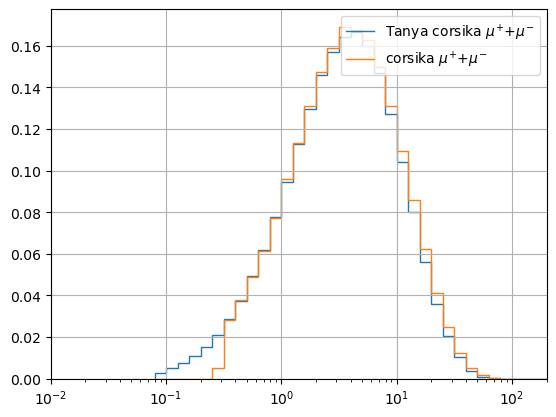

In [37]:
cdata = combined_data(en_hist_tanya, (-13, 13), 3)
plt.stairs(*cdata[0:2], label = f"Tanya corsika {cdata[2]}")

cdata = combined_data(en_hist, (-13, 13), 3)
plt.stairs(*cdata[0:2], label = f"corsika {cdata[2]}")

# plt.stairs(mceq_loss.flux["mu"], mceq_loss.e_bins, 
#            label = r"${\mu}^{+} + {\mu}^{-}$ mceq", linestyle='--')

plt.xscale("log")
# plt.yscale("log")
plt.xlim(1e-2, 2e2)
# plt.ylim(-0.01, 0.5)
plt.legend()
plt.grid()

Histogram of -13 with mass 0.1056583745
Histogram of 13 with mass 0.1056583745


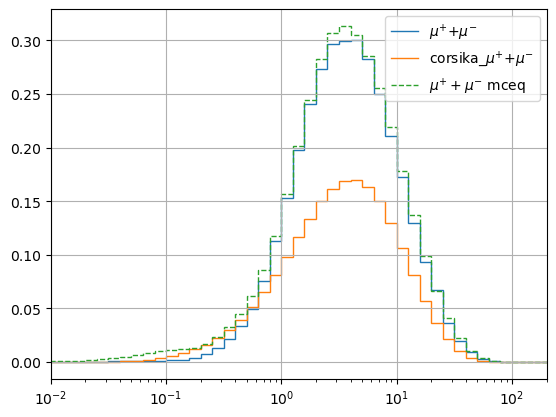

In [22]:
bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-13, 13), bins = mceq_dist.e_bins)
plt.stairs(hist, bins, label = label, linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-12, -12), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-14, 14), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

cdata = combined_data(en_hist_tanya, (-13, 13), 2)
plt.stairs(*cdata[0:2], label = f"corsika_{cdata[2]}")
# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-211, 211), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (111,), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-11, 11), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-11,), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (11,), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

plt.stairs(mceq_dist.flux["mu"], mceq_dist.e_bins, 
           label = r"${\mu}^{+} + {\mu}^{-}$ mceq", linestyle='--')
# plt.stairs(mceq_dist.flux["numu"], mceq_dist.e_bins, 
#            label = r"$\bar{\nu}_{\mu} + {\nu}_{\mu}$ mceq", linestyle='--')
# plt.stairs(mceq_dist.flux["nue"], mceq_dist.e_bins, 
#            label = r"$\bar{\nu}_{e} + {\nu}_{e}$ mceq", linestyle='--')
# plt.stairs(mceq_dist.flux["pi"], mceq_dist.e_bins, 
#            label = r"$\bar{\pi}^{+} + {\pi}^{-}$ mceq", linestyle='--')

# plt.stairs(mceq_dist.flux["el"], mceq_dist.e_bins, 
#            label = r"$\bar{e}^{+} + {e}^{-}$ mceq", linestyle='--')

# plt.stairs(mceq_dist.flux["e+"], mceq_dist.e_bins, 
#            label = r"${e}^{+}$ mceq", linestyle='--')

# plt.stairs(mceq_dist.flux["e-"], mceq_dist.e_bins, 
#            label = r"${e}^{-}$ mceq", linestyle='--')

plt.xscale("log")
# plt.yscale("log")
plt.xlim(1e-2, 2e2)
# plt.ylim(-0.01, 0.5)
plt.legend()
plt.grid()

Histogram of -13 with mass 0.1056583745
Histogram of 13 with mass 0.1056583745


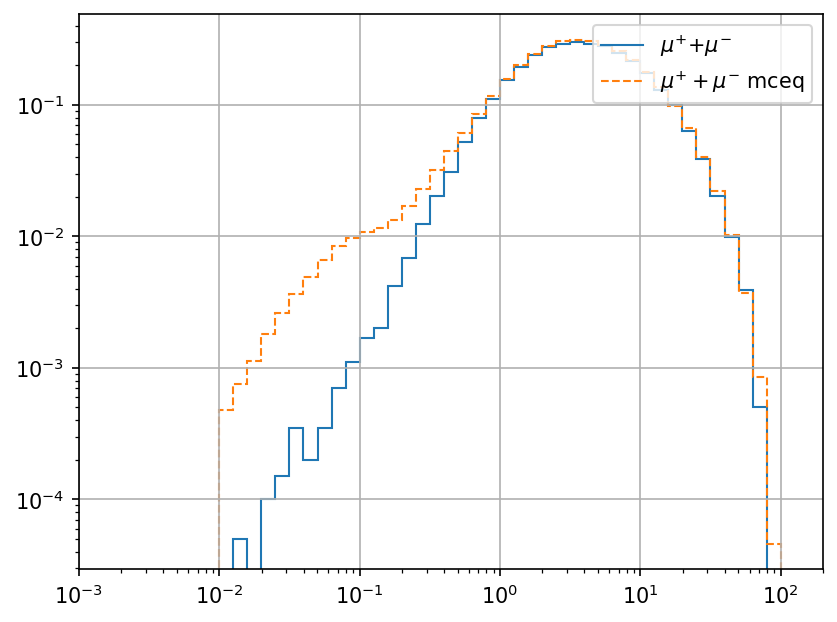

In [95]:
plt.rcParams["figure.dpi"] = 150

bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-13, 13), bins = mceq_dist.e_bins)
plt.stairs(hist, bins, label = label, linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-12, -12), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-14, 14), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-211, 211), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-11, 11), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-11,), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (11,), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

plt.stairs(mceq_dist.flux["mu"], mceq_dist.e_bins, 
           label = r"${\mu}^{+} + {\mu}^{-}$ mceq", linestyle='--')

# plt.stairs(mceq_hybrid.flux["mu"], mceq_dist.e_bins, 
#            label = r"${\mu}^{+} + {\mu}^{-}$ mceq hb", linestyle='--')
# plt.stairs(mceq_dist.flux["numu"], mceq_dist.e_bins, 
#            label = r"$\bar{\nu}_{\mu} + {\nu}_{\mu}$ mceq", linestyle='--')
# plt.stairs(mceq_dist.flux["nue"], mceq_dist.e_bins, 
#            label = r"$\bar{\nu}_{e} + {\nu}_{e}$ mceq", linestyle='--')
# plt.stairs(mceq_dist.flux["pi"], mceq_dist.e_bins, 
#            label = r"$\bar{\pi}^{+} + {\pi}^{-}$ mceq", linestyle='--')

# plt.stairs(mceq_dist.flux["el"], mceq_dist.e_bins, 
#            label = r"$\bar{e}^{+} + {e}^{-}$ mceq", linestyle='--')

# plt.stairs(mceq_dist.flux["e+"], mceq_dist.e_bins, 
#            label = r"${e}^{+}$ mceq", linestyle='--')

# plt.stairs(mceq_dist.flux["e-"], mceq_dist.e_bins, 
#            label = r"${e}^{-}$ mceq", linestyle='--')

plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-3, 2e2)
# plt.ylim(-0.01, 0.5)
plt.legend()
plt.grid()
# plt.savefig('temp.png', transparent=True)

Histogram of -13 with mass 0.1056583745
Histogram of 13 with mass 0.1056583745


/tmp/ipykernel_849944/659946842.py:3: RuntimeWarning: invalid value encountered in divide
  plt.stairs(hist/mceq_dist.flux["mu"], mceq_dist.e_bins,


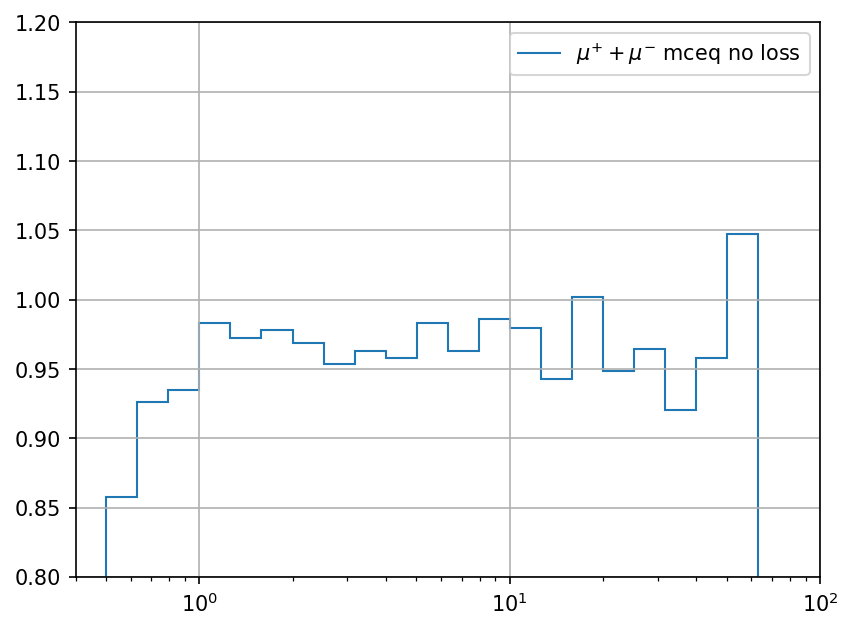

In [96]:
bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-13, 13), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')
plt.stairs(hist/mceq_dist.flux["mu"], mceq_dist.e_bins, 
           label = r"${\mu}^{+} + {\mu}^{-}$ mceq no loss", linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-12, 12), bins = mceq_dist.e_bins)
# # plt.stairs(hist, bins, label = label, linestyle='-')
# plt.stairs(hist/mceq_dist.flux["nue"], mceq_dist.e_bins, 
#            label = r"${\nu}^{+} + {\nu}^{-}$ mceq no loss", linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-14, 14), bins = mceq_dist.e_bins)
# # plt.stairs(hist, bins, label = label, linestyle='-')
# plt.stairs(hist/mceq_dist.flux["numu"], mceq_dist.e_bins, 
#            label = r"${\nu}^{+} + {\nu}^{-}$ mceq no loss", linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-11, 11), bins = mceq_dist.e_bins)
# # plt.stairs(hist, bins, label = label, linestyle='-')
# plt.stairs(hist/mceq_dist.flux["el"], mceq_dist.e_bins, 
#            label = r"${e}^{+} + {e}^{-}$ mceq no loss", linestyle='-')

# plt.stairs(mceq_loss.flux["mu"], mceq_loss.e_bins, 
#            label = r"${\mu}^{+} + {\mu}^{-}$ mceq loss", linestyle='--')

plt.xscale("log")
plt.xlim(4e-1, 1e2)
plt.ylim(0.8, 1.2)
plt.legend()
plt.grid()

Histogram of -211 with mass 0.13957039000000002
Histogram of 211 with mass 0.13957039000000002


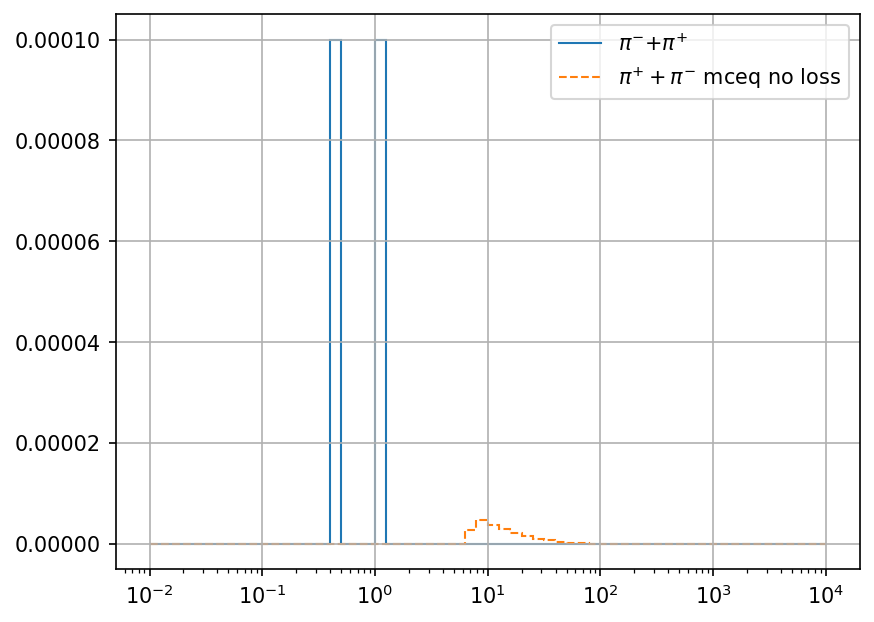

In [127]:
bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-211, 211), bins = mceq_dist.e_bins)
plt.stairs(hist, bins, label = label, linestyle='-')


plt.stairs(mceq_dist.flux["pi"], mceq_dist.e_bins, 
           label = r"${\pi}^{+} + {\pi}^{-}$ mceq no loss", linestyle='--')

# plt.stairs(mceq_loss.flux["mu"], mceq_loss.e_bins, 
#            label = r"${\mu}^{+} + {\mu}^{-}$ mceq loss", linestyle='--')

plt.xscale("log")
# plt.xlim(1e-2, 2e2)
# plt.ylim(-0.01, 0.5)
plt.legend()
plt.grid()

Histogram of -13 with mass 0.1056583745
Histogram of 13 with mass 0.1056583745
Histogram of -12 with mass 0.0
Histogram of 12 with mass 0.0
Histogram of -14 with mass 0.0
Histogram of 14 with mass 0.0


/tmp/ipykernel_2938205/1991008938.py:2: RuntimeWarning: invalid value encountered in divide
  plt.stairs(hist/mceq_dist.flux["mu"], bins, label = f"{label} cas/mceq", linestyle='-')
/tmp/ipykernel_2938205/1991008938.py:5: RuntimeWarning: invalid value encountered in divide
  plt.stairs(hist/mceq_dist.flux["nue"], bins, label = f"{label} cas/mceq", linestyle='-')
/tmp/ipykernel_2938205/1991008938.py:8: RuntimeWarning: invalid value encountered in divide
  plt.stairs(hist/mceq_dist.flux["numu"], bins, label = f"{label} cas/mceq", linestyle='-')


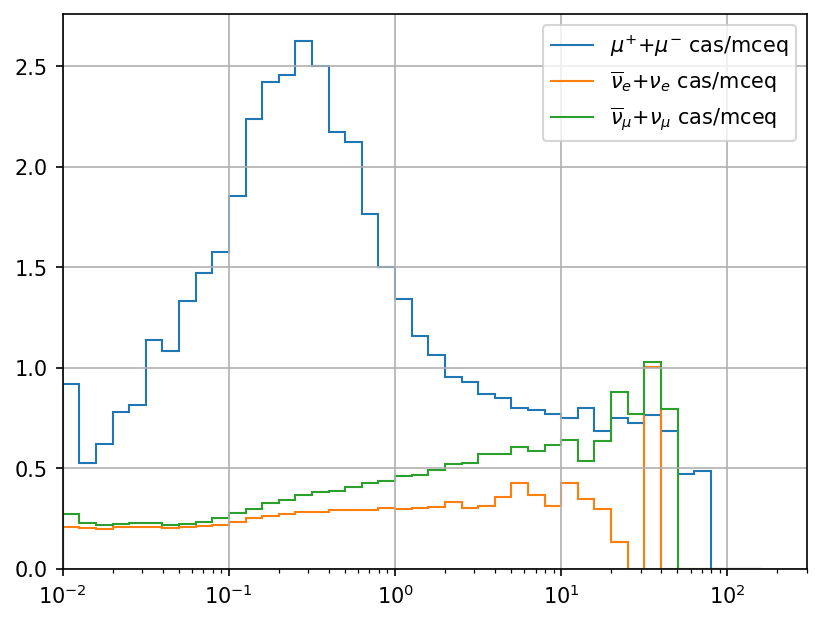

In [172]:
bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-13, 13), bins = mceq_dist.e_bins)
plt.stairs(hist/mceq_dist.flux["mu"], bins, label = f"{label} cas/mceq", linestyle='-')

bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-12, 12), bins = mceq_dist.e_bins)
plt.stairs(hist/mceq_dist.flux["nue"], bins, label = f"{label} cas/mceq", linestyle='-')

bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-14, 14), bins = mceq_dist.e_bins)
plt.stairs(hist/mceq_dist.flux["numu"], bins, label = f"{label} cas/mceq", linestyle='-')


# plt.stairs(mceq_dist.flux["mu"]/1.1, mceq_dist.e_bins, 
#            label = r"${\mu}^{+} + {\mu}^{-}$ mceq no loss", linestyle='--')

# plt.stairs(mceq_loss.flux["mu"], mceq_loss.e_bins, 
#            label = r"${\mu}^{+} + {\mu}^{-}$ mceq loss", linestyle='--')

plt.xscale("log")
plt.xlim(1e-2, 3e2)
# plt.xlim(4e-1, 3e2)
# plt.ylim(0.8, 1.2)
plt.legend()
plt.grid()

In [15]:
plt.plot(mceq_loss.e_grid, mceq_loss.flux["mu"], 
         label = r"${\mu}^{+} + {\mu}^{-}$ USStd", linestyle='--')

# plt.plot(mceq_loss_bk.e_grid, mceq_loss_bk.flux["mu"], 
#          label = r"${\mu}^{+} + {\mu}^{-}$ BK_USStd", linestyle='-')

plt.xscale("log")
plt.xlim(4e-1, 2e2)
plt.ylim(-0.01, 0.31)
plt.legend()
plt.savefig('temp1.png', transparent=True)

NameError: name 'mceq_loss' is not defined

In [ ]:
plt.plot(mceq_loss.e_grid, mceq_loss_bk.flux["mu"]/mceq_loss.flux["mu"], 
         label = r"${\mu}^{+} + {\mu}^{-}$ (BK_USStd/USStd)", linestyle='--')

# plt.plot(mceq_loss_bk.e_grid, mceq_loss_bk.flux["mu"], 
#          label = r"${\mu}^{+} + {\mu}^{-}$ bk", linestyle='-')

plt.xscale("log")
plt.xlim(4e-1, 2e2)
# plt.ylim(-0.01, 0.31)
plt.legend()
plt.savefig('temp.png', transparent=True)

In [ ]:
plt.plot(res_mceq.egrid, res_mceq.mu_spec[1], label = f"{res_mceq.mu_spec[2]}", linestyle='--')

plt.xscale("log")
plt.xlim(4e-1, 2e2)
plt.ylim(-0.01, 0.31)
plt.legend()
plt.savefig('temp.png', transparent=True)

In [ ]:
plt.plot(res_mceq.egrid, res_mceq.numu_spec[1], label = f"{res_mceq.numu_spec[2]} stairs", linestyle='--')

plt.xscale("log")
plt.xlim(4e-1, 2e2)
plt.ylim(-0.01, 2.5)
plt.legend()
plt.savefig('temp_line.png', transparent=True)

In [ ]:
plt.xscale("log")
plt.xlim(1e-1, 1e2)
plt.ylim(0.8, 1.2)
plt.step(res_mceq.mu_spec[0], cascade_analysis.mu/res_mceq.mu_spec[1], 
         label = r"${\mu}^{+} + {\mu}^{-}$ casc/mceq", linestyle='-', color = 'red')
plt.step(res_mceq.mu_spec[0], cascade_analysis.numu/res_mceq.numu_spec[1], 
         label = r"$\bar{\nu}_{\mu} + {\nu}_{\mu}$ casc/mceq", linestyle='-', color = 'green')
plt.step(res_mceq.mu_spec[0], cascade_analysis.nue/res_mceq.nue_spec[1], 
         label = r"$\bar{\nu}_{e} + {\nu}_{e}$ casc/mceq", linestyle='-', color = 'blue')
plt.step(res_mceq.mu_spec[0], res_mceq.nue_spec[1]/res_mceq.nue_spec[1], color = 'grey')
plt.legend()

In [ ]:
plt.xscale("log")
# plt.yscale("log")
plt.step(res_mceq.mu_spec[0], res_mceq.mu_spec[1], 
         label = r"${\mu}^{+} + {\mu}^{-}$ mceq", linestyle='--', color = 'red')
plt.step(res_mceq.mu_spec[0], cascade_analysis.mu, 
         label = r"${\mu}^{+} + {\mu}^{-}$ casc", linestyle='-', color = 'red')
plt.step(res_mceq.mu_spec[0], res_mceq.numu_spec[1], 
         label = r"$\bar{\nu}_{\mu} + {\nu}_{\mu}$ mceq", linestyle=':', color = 'green')
plt.step(res_mceq.mu_spec[0], cascade_analysis.numu, 
         label = r"$\bar{\nu}_{\mu} + {\nu}_{\mu}$ casc", linestyle='-', color = 'green')
plt.step(res_mceq.mu_spec[0], res_mceq.nue_spec[1], 
         label = r"$\bar{\nu}_{e} + {\nu}_{e}$ mceq", linestyle=':', color = 'blue')
plt.step(res_mceq.mu_spec[0], cascade_analysis.nue, 
         label = r"$\bar{\nu}_{e} + {\nu}_{e}$ casc", linestyle='-', color = 'blue')
# plt.step(res_mceq.numu_spec[0], res_mceq.numu_spec[1], label = res_mceq.numu_spec[2], linestyle='--')
# plt.step(res_mceq.nue_spec[0], res_mceq.nue_spec[1], label = res_mceq.nue_spec[2], linestyle='--')
plt.xlim(1e-1, 1e3)
# plt.ylim(0, 0.5)
plt.legend()

In [ ]:
plt.xscale("log")
plt.yscale("log")
plt.step(res_mceq.mu_spec[0], cascade_analysis.numu_from_mu, 
         label = r"$\bar{\nu}_{\mu} + {\nu}_{\mu}$ from muons", linestyle='--', color = 'green')
plt.step(res_mceq.mu_spec[0], cascade_analysis.numu_from_other, 
         label = r"$\bar{\nu}_{\mu} + {\nu}_{\mu}$ from other", linestyle=':', color = 'green')
plt.step(res_mceq.mu_spec[0], cascade_analysis.numu, 
         label = r"$\bar{\nu}_{\mu} + {\nu}_{\mu}$ total", linestyle='-', color = 'green')
plt.step(res_mceq.mu_spec[0], cascade_analysis.nue_from_mu, 
         label = r"$\bar{\nu}_{e} + {\nu}_{e}$ from muons", linestyle='--', color = 'blue')
plt.step(res_mceq.mu_spec[0], cascade_analysis.nue_from_other, 
         label = r"$\bar{\nu}_{e} + {\nu}_{e}$ from other", linestyle=':', color = 'blue')
plt.step(res_mceq.mu_spec[0], cascade_analysis.nue, 
         label = r"$\bar{\nu}_{e} + {\nu}_{e}$ total", linestyle='-', color = 'blue')
# plt.step(res_mceq.numu_spec[0], res_mceq.numu_spec[1], label = res_mceq.numu_spec[2], linestyle='--')
# plt.step(res_mceq.nue_spec[0], res_mceq.nue_spec[1], label = res_mceq.nue_spec[2], linestyle='--')
plt.xlim(1e-1, 1e3)
plt.legend()

In [ ]:
from fluka_comparison.fluka_muon_data import fluka_en_dist

In [ ]:
for name, value in fluka_en_dist().items():
    # plt.steps(value[0], value[1])
    plt.stairs(value[1], value[0], label = f"depth = {name}")
    en_bins = value[0]

gr, cnt = np.histogram(cascade_analysis.raw_muon_data[0], bins=en_bins)
gr = gr/cascade_analysis.raw_muon_data[1] 
print(cnt, gr)
plt.stairs(gr, cnt, label = "depth = 635.955, cas")
plt.legend()
plt.ylim(0, 2) 

# gr1, cnt = np.histogram(self.neutrinos_from_muons[muon_neut].energy, bins = nbins, range = xrange)
#         gr1 = gr1/runs_number
#         plt.step(mceq_egrid, gr1, lab

In [ ]:
cascade_analysis.plot_xdepth_list(nbins = 100, pids = [-14, 14, 2212, -13, 13], 
                                  xrange = (0, 1012), per_run = True)

In [ ]:
cascade_analysis.plot_xdepth_stop(nbins = 100, pids = [-14, 14, 2212, -13, 13, 22], #pids = None, 
                                  all_pids = True, 
                                  xrange = (0, 1168), per_run = False)

In [ ]:
cascade_analysis.plot_height_list(pids = [22, -13, 13, -11, 11], all_pids=True)

In [ ]:
cascade_analysis.digitize()

In [ ]:
import matplotlib.pylab as plt
plt.semilogx(cascade_analysis.egrid, cascade_analysis.hist_dict[22][0][99])



len(cascade_analysis.hist_dict[22][0])